In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../preprocessing/apartments_preprocessed.csv')

In [3]:
df['turbulent'] = 0
df['family-friendly'] = 0
df['nature-lovely'] = 0

# washington dc, massachusets, utah, illinois, minnessota, oregon, wisconsin, virginia, colombia
turbulent_class = ['WA','DC','MA','UT','IL','MN', 'OR', 'WI', 'VA','CO', 'NY', 'CT', 'NE','CA']

#massachusetts,minnesota, north dakota, vermont, new hampshire, new jersey, iowa, washington
family_friendly_class = ['MA','MN','ND','VT','NH','NJ', 'NE','IA', 'CT', 'WA']

#california, alaska, utah, colorado, hawaii, arizona, washington, wyoming, massachusetts, florida, oregon, montana, north carolina
nature_lovely_class = ['CA', 'AK', 'UT', 'CO', 'HI', 'AZ', 'WA', 'WY', 'MA', 'FL', 'OR', 'MT', 'NC','CA']


df.loc[df['state'].isin(turbulent_class), 'turbulent'] = 1
df.loc[df['state'].isin(family_friendly_class), 'family-friendly'] = 1
df.loc[df['state'].isin(nature_lovely_class), 'nature-lovely'] = 1
    

In [4]:
X = pd.DataFrame(data=df, columns=['price','square_meters','luxury','turbulent','family-friendly','nature-lovely','longitude','latitude'])
feature_names = ['price','square_meters','luxury','turbulent','family-friendly','nature-lovely','longitude','latitude']

In [5]:
X

,price,square_meters,luxury,turbulent,family-friendly,nature-lovely,longitude,latitude
0,790,9.393,0,1,0,0,-76.9861,38.9057
1,425,9.858,0,0,0,0,-87.6621,37.9680
2,1390,9.951,0,1,0,0,-77.0816,38.8910
3,925,10.788,0,1,1,1,-122.3275,47.6160
4,880,11.625,0,1,0,0,-77.1055,38.8738
...,...,...,...,...,...,...,...,...
9917,6000,585.900,0,1,1,0,-93.3233,44.9000
9918,25000,810.588,0,1,0,1,-119.6331,34.4331
9919,11000,1052.574,0,0,0,0,-77.2409,39.0287
9920,4790,71.000,1,1,0,0,-73.9876,40.7716


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
X = scaler.fit_transform(X)

In [9]:
X = pd.DataFrame(X, columns=feature_names)
X

,price,square_meters,luxury,turbulent,family-friendly,nature-lovely,longitude,latitude
0,0.023790,0.000000,0.0,1.0,0.0,0.0,0.922641,0.436714
1,0.009073,0.000446,0.0,0.0,0.0,0.0,0.801088,0.413434
2,0.047984,0.000535,0.0,1.0,0.0,0.0,0.921553,0.436349
3,0.029234,0.001337,0.0,1.0,1.0,1.0,0.406403,0.652966
4,0.027419,0.002140,0.0,1.0,0.0,0.0,0.921281,0.435922
...,...,...,...,...,...,...,...,...
9917,0.233871,0.552643,0.0,1.0,1.0,0.0,0.736632,0.585536
9918,1.000000,0.768031,0.0,1.0,0.0,1.0,0.437081,0.325673
9919,0.435484,1.000000,0.0,0.0,0.0,0.0,0.919740,0.439768
9920,0.185081,0.059057,1.0,1.0,0.0,0.0,0.956780,0.483039


In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)

In [12]:
model.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

In [13]:
model.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [14]:
df[model.labels_ == 2]

,title,bathrooms,bedrooms,price,square_meters,cityname,state,latitude,longitude,source,luxury,turbulent,family-friendly,nature-lovely
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...",1.0,0.0,790,9.393,Washington,DC,38.9057,-76.9861,RentLingo,0,1,0,0
1,Studio apartment 814 Schutte Road,1.0,1.0,425,9.858,Evansville,IN,37.9680,-87.6621,RentLingo,0,0,0,0
2,"Studio apartment N Scott St, 14th St N, Arling...",1.0,0.0,1390,9.951,Arlington,VA,38.8910,-77.0816,RentLingo,0,1,0,0
4,"Studio apartment Washington Blvd, N Cleveland ...",1.0,0.0,880,11.625,Arlington,VA,38.8738,-77.1055,RentLingo,0,1,0,0
5,0 BR in New York NY 10019,1.0,0.0,2475,12.090,Manhattan,NY,40.7629,-73.9885,Listanza,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,Four BR 17595 Burl Oak Court,5.0,4.0,4500,502.851,Eden Prairie,MN,44.8653,-93.4749,RentLingo,0,1,1,0
9917,Five BR 5407 Abbott Place - Abbott,4.0,5.0,6000,585.900,Edina,MN,44.9000,-93.3233,RentLingo,0,1,1,0
9919,Six BR 9908 Bentcross Drive,8.5,6.0,11000,1052.574,Potomac,MD,39.0287,-77.2409,RentLingo,0,0,0,0
9920,One BR in New York NY 10069,1.0,1.0,4790,71.000,New York,NY,40.7716,-73.9876,Listanza,1,1,0,0


In [15]:
model.distances_

array([0.        , 0.        , 0.        , ..., 1.000007  , 1.0000414 ,
       1.00005856])

# Poredjenje Kmeans i Agglomerative clustering

In [16]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

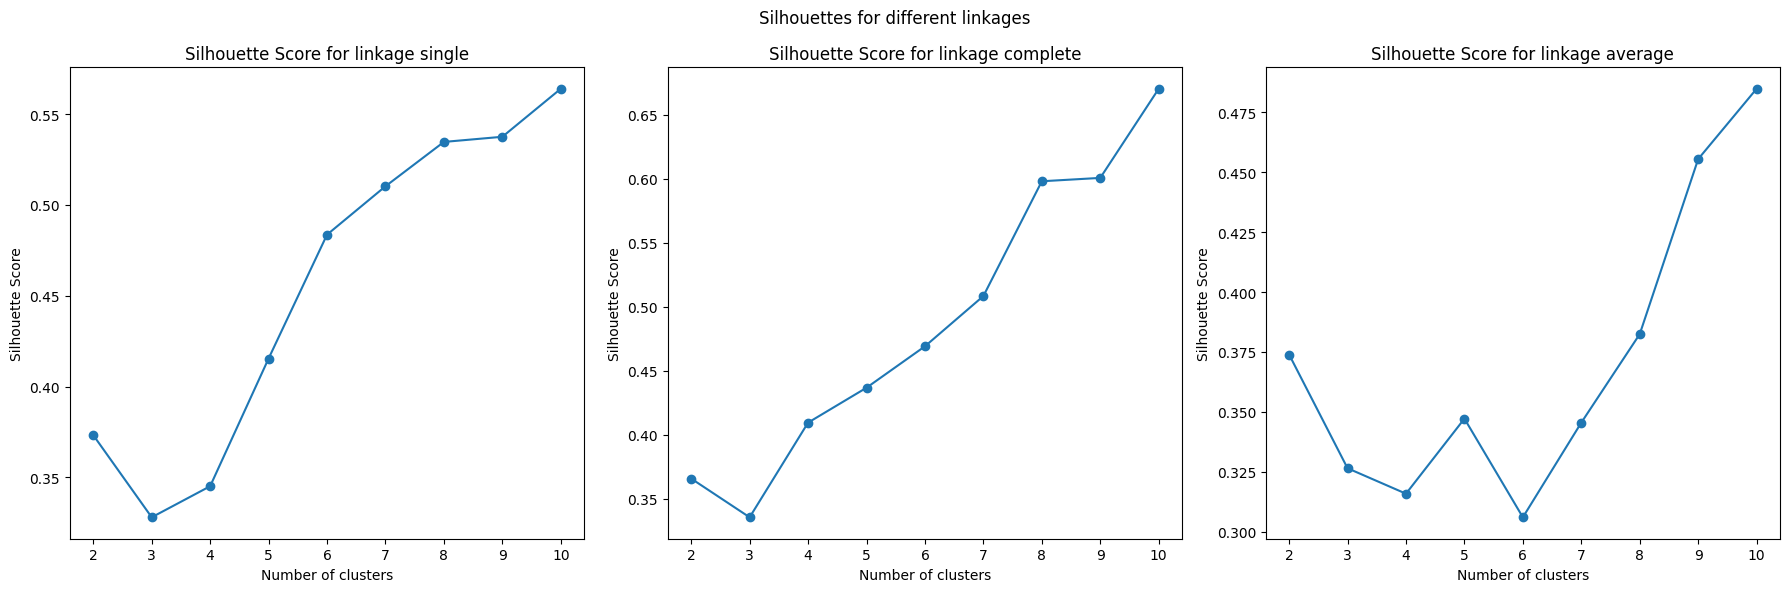

In [37]:
from sklearn.metrics import silhouette_score

linkages = ['single', 'complete', 'average']

# Kreiranje glavnog platna sa potplotovima
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Silhouettes for different linkages')

scores7 = []

for idx, linkage in enumerate(linkages):
    silhouette_scores = []  # Resetovanje liste za svaku vrstu linka
    for k in range(2, 11):
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        model.fit(X)
        score = silhouette_score(X, model.labels_)
        silhouette_scores.append(score)

    scores7.append((silhouette_scores[6]))
    ax = axes[idx]
    ax.plot(range(2, 11), silhouette_scores, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score for linkage {}'.format(linkage))

plt.tight_layout()
plt.show()


Slicna situacija kao za Kmeans, veliki broj klastera moze da da bude kontraproduktivan, tako da je 7 broj klastera na kome cemo se zaustaviti. U kom su odnosu pokazace sledece precizne brojke:

In [39]:
scores7

[0.5347206421586691, 0.5981439104184189, 0.38243763325205554]

Najbolji score za 7 klastera je za linkage = complete, i on je cak i bolji od Kmeans algoritma kome je silhouette score oko 0.56

## Dendrogram

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
Z = linkage(X, method='complete')
Z

array([[2.57700000e+03, 2.58000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.58100000e+03, 9.92200000e+03, 0.00000000e+00, 3.00000000e+00],
       [1.29900000e+03, 1.30000000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.98340000e+04, 1.98370000e+04, 2.04802104e+00, 6.71600000e+03],
       [1.98380000e+04, 1.98390000e+04, 2.09555764e+00, 3.20600000e+03],
       [1.98400000e+04, 1.98410000e+04, 2.41529400e+00, 9.92200000e+03]])

In [28]:
df.index

RangeIndex(start=0, stop=9922, step=1)

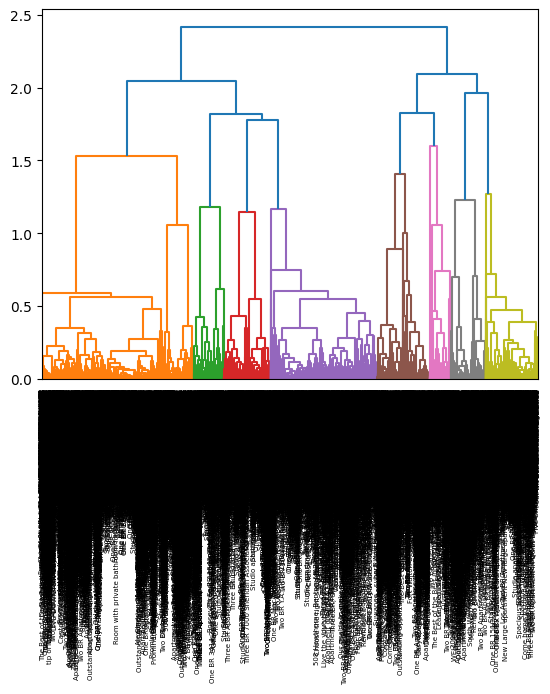

In [29]:
X = X.set_index(df['title'])
_ = dendrogram(Z, labels=X.index, leaf_rotation=90)

the bigger the distance between two links, the bigger the difference in terms of features

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
model = DBSCAN(eps=0.1, min_samples=2)

In [32]:
model.fit(X)

DBSCAN(eps=0.1, min_samples=2)

In [33]:
import numpy as np

np.unique(model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36])

/tmp/ipykernel_6833/2465909471.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


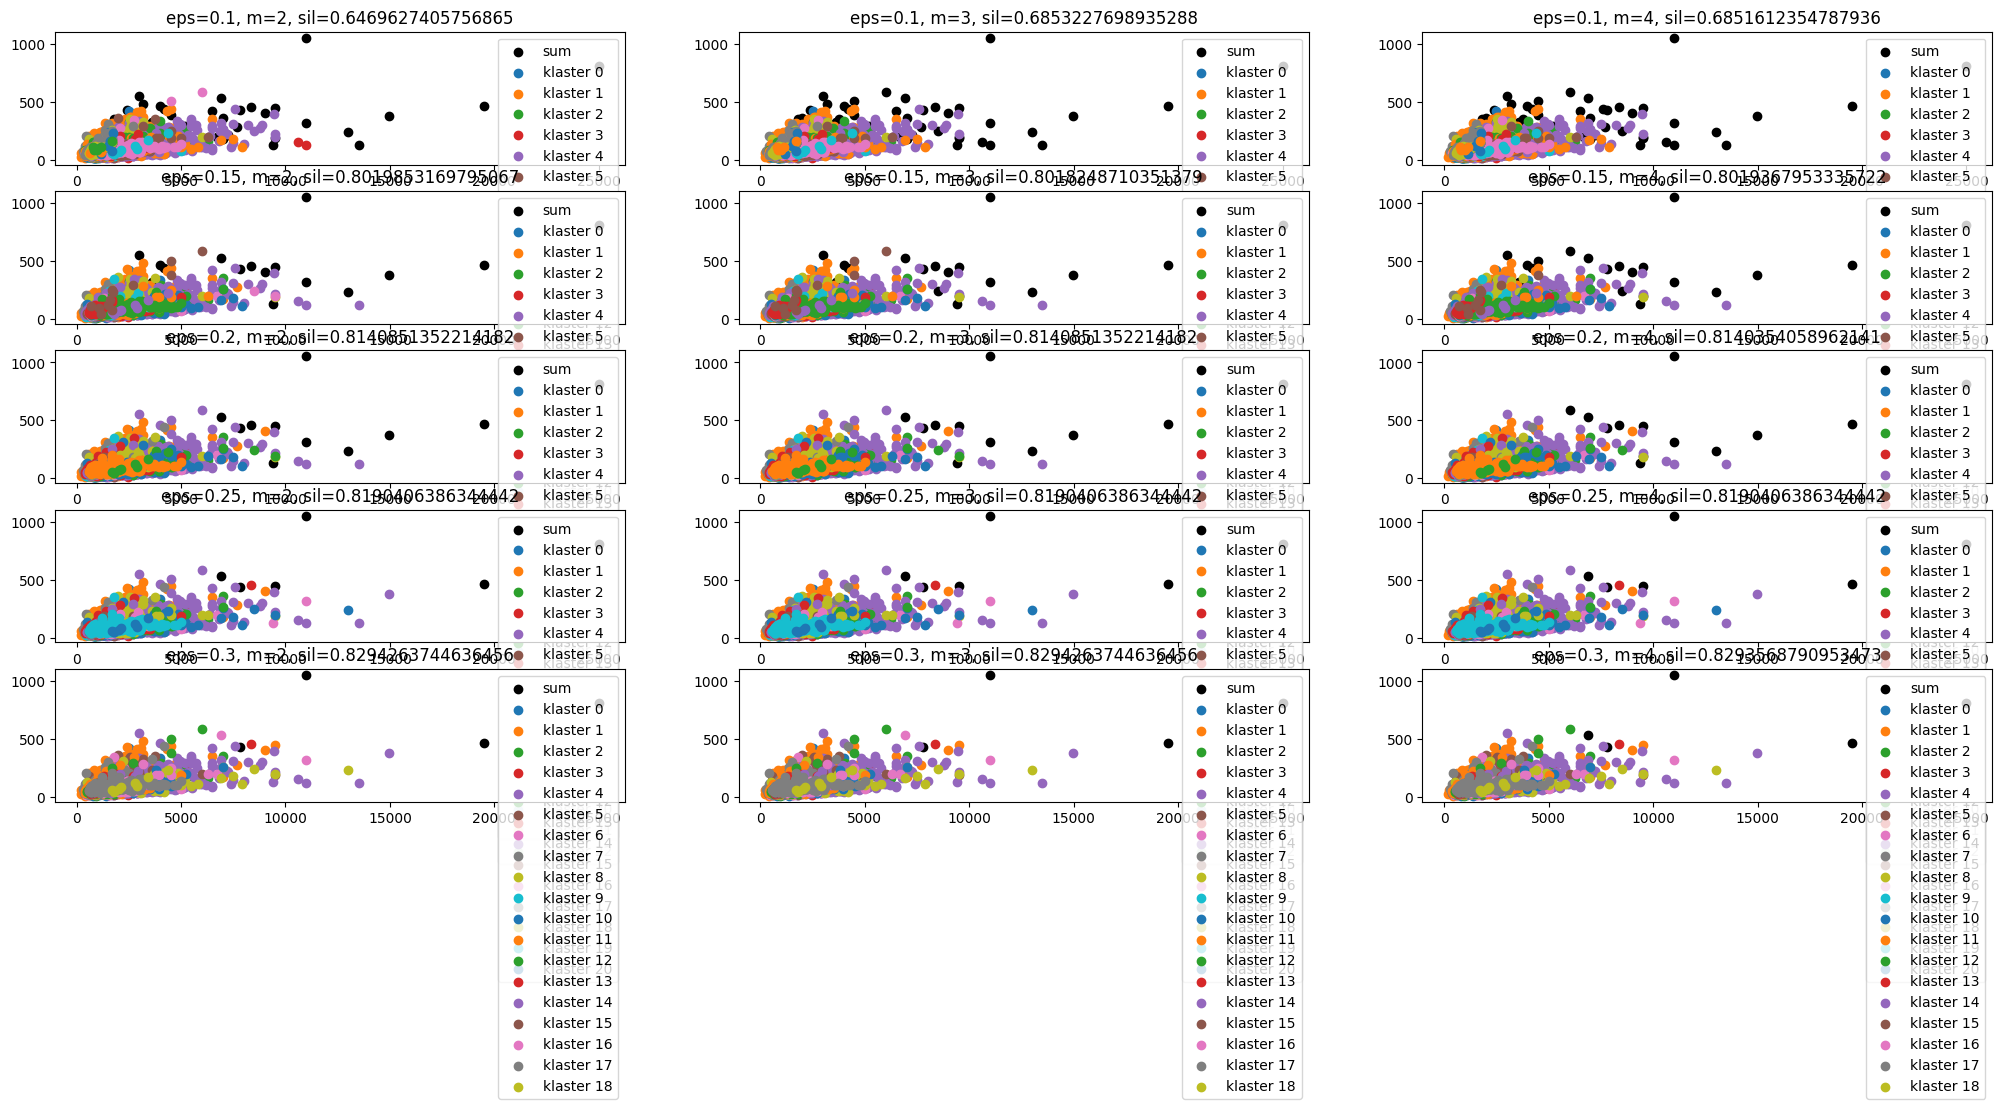

In [34]:
min_samples = 2
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = range(2,5)
fig = plt.figure(figsize=(25,10))
idx = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)

        fig.add_subplot(len(eps_values), len(min_samples_values), idx)
        idx += 1

        for cluster_label in np.unique(model.labels_):
            cluster = df[model.labels_ == cluster_label]
            if cluster_label == -1:
                plt.scatter(cluster['price'], cluster['square_meters'], color='black', label='sum')
            else:
                plt.scatter(cluster['price'], cluster['square_meters'], label=f'klaster {cluster_label}')

        plt.legend()
        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(X, model.labels_)
        plt.title(f'eps={eps}, m={min_samples}, sil={s}')
plt.tight_layout()